In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Обработка результатов

## **Изучение полученных результатов из УМ**

In [2]:
def get_result(config:str,way_type:str,fault:str,speed:int,profile:str = "gost") ->pd.DataFrame:
    """
    Получение результатов расчетов по ключевым словам
    1. `config` принимает два вида строк `empty` и `loaded`
    2. `way_type` принимает три вида строк `straight`, `curve_350` и `curve_650`
    3. `fault` принимает три вида строк `normal`, `polzun15`, `ellips10`
    4. `speed` от 10 до 60 км/ч
    5. `profile` есть профили `gost`, `newwagonw`, `greb_26`, `greb_30`, `greb_28`
    """
    if config == "empty":
        PATH = "C:\\Users\\Daniil\\Desktop\\simulation_results\\empty"
    
    elif config == "loaded":
        PATH = "C:\\Users\\Daniil\\Desktop\\simulation_results\\loaded"
    
    name = "\\"+config+"_"+way_type+"_"+fault+"_"+str(speed)+"_"+profile+".csv"

    l_name = len(name)

    FULL_PATH = PATH+name

    file = pd.read_csv(FULL_PATH,encoding='latin-1')

    COL_NAMES = ["time_step",name[1:l_name-4]]

    file.columns = COL_NAMES

    file = file.set_index("time_step")
    
    return file


In [3]:
def get_profile_results(config:str,way_type:str,fault:str,speed:int):
    file1 = get_result(config, way_type,fault,speed)
    file2 = get_result(config, way_type,fault,speed, "greb_26")
    file3 = get_result(config, way_type,fault,speed, "greb_28")
    file4 = get_result(config, way_type,fault,speed, "greb_30")
    file5 = get_result(config, way_type,fault,speed, "newwagonw")

    return file1,file2,file3,file4,file5

In [4]:
def plot_profile_results(config:str,way_type:str,fault:str,speed:int):
    
    d={"loaded":"Груженый",
       "empty":"Порожний",
       "straight":"прямая",
       "curve_350":"кривая 350 м",
       "curve_650":"кривая 650 м",
       "normal":"без неисправностей",
       "polzun15":"ползун",
       "ellips10":"неравномерный прокат"}
    
   #  sns.set (rc={' axes.facecolor':'#C0C0C0', 'figure.facecolor':'#FFFFF0 '})
    
    files = get_profile_results(config, way_type,fault,speed)
    FILE = pd.concat(files,axis=1)
    FILE.columns = ["gost","greb_26","greb_28","greb_30","newwagonw"]

    plt.figure(figsize=(12,8))
    sns.lineplot(FILE)
    plt.title(f"{d[config]} вагон, {d[way_type]}, {d[fault]} скорость {speed} км/ч ")
    plt.xlabel("Время, с")
    plt.ylabel("Вертикальная сила, Н")
    plt.show()



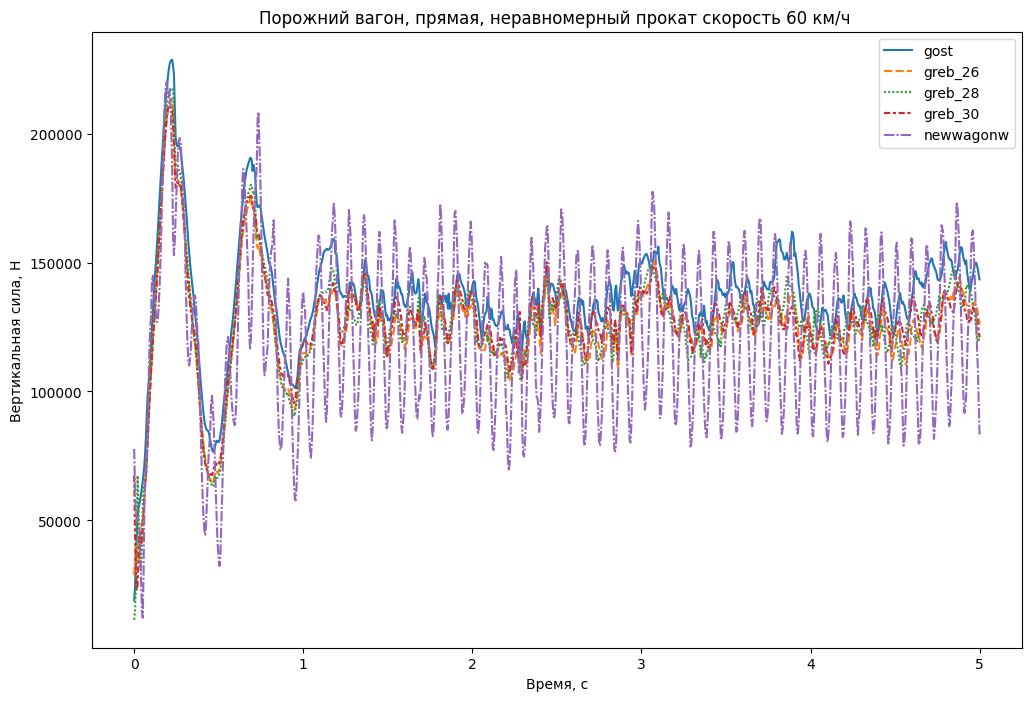

In [5]:
plot_profile_results("empty","straight","ellips10",60)

In [6]:
empty_straight_normal_10 = get_result("empty","straight","normal",10)
empty_straight_normal_10.head()

,empty_straight_normal_10_gost
time_step,
0.000000,29575.992
0.005109,32467.777
0.010109,35095.023
0.015109,38440.480
0.020109,41884.520


In [7]:
empty_straight_normal_20 = get_result("empty","straight","normal",20)
empty_straight_normal_20.head()

,empty_straight_normal_20_gost
time_step,
0.000000,29575.992
0.005109,32136.971
0.010109,35086.570
0.015109,39165.609
0.020109,43360.832


<AxesSubplot: xlabel='time_step'>

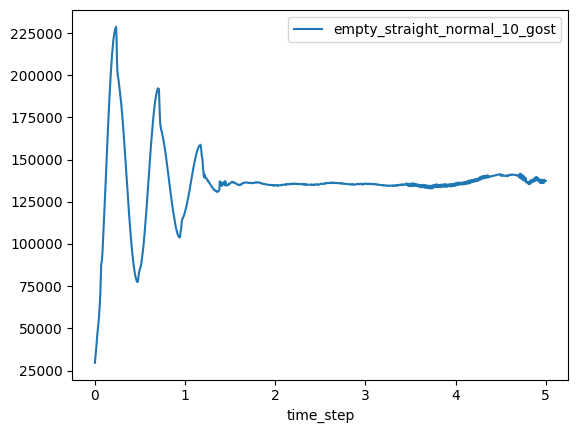

In [8]:
empty_straight_normal_10.plot()

<AxesSubplot: xlabel='time_step'>

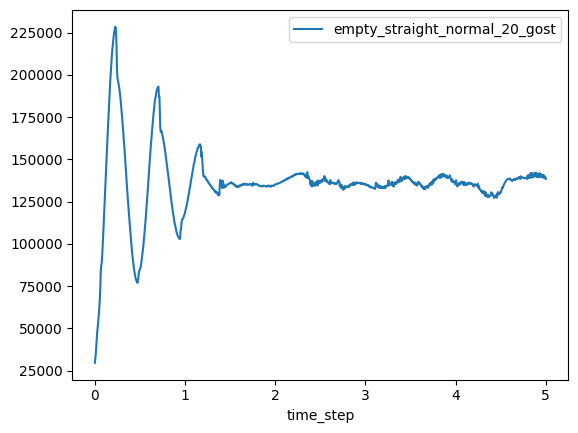

In [9]:
empty_straight_normal_20.plot()

In [10]:
empty_straight_normal_10.columns[0]

'empty_straight_normal_10_gost'

## **Подготовка инфы для разделения на кастомные фолды**

Так как колесо по ГОСТ имеет радиус 475 мм, то полный оборот колеса fold = 2*pi*475

Тогда время прохождения полного оборота колеса будет равно t = fold/v 

In [11]:
def time_split(v:int) -> int:
    """Определение временного промежутка полного оборота колеса
    1. v - скорость движения поезда, км/ч
    """
    speed = v/3.6
    lenght = 2*np.pi*0.475
    t = lenght/speed
    return t

In [12]:
def get_time_splits(data:pd.DataFrame) -> list:
    """Возвращает индексы по которым нужно производить обрез
    Индексы высчтитываются в зависимости от скорости движения вагона и радиуса колеса"""
    res = []

    start_point = 1.4

    time_max_point = data.index.max()               # Максимальное время

    col_name = data.columns[0].split("_")           # 10,20,30... км/ч

    wheel_rotate_num = time_split(int(col_name[3])) # 1.007 сек

    num_folds = (time_max_point-1)//wheel_rotate_num    # Сколько всего фолдов получится сделать

    res.append(start_point)

    for _ in range(int(num_folds)):
        start_point+= wheel_rotate_num
        res.append(start_point)

    return res

In [13]:
indexes = get_time_splits(empty_straight_normal_10)

In [14]:
get_time_splits(empty_straight_normal_20)

[1.4,
 1.9372123437638544,
 2.474424687527709,
 3.0116370312915635,
 3.548849375055418,
 4.0860617188192725,
 4.6232740625831275,
 5.160486406346982]

In [15]:
np.zeros((1,1))

array([[0.]])

In [16]:
empty_straight_normal_10[(empty_straight_normal_10.index>1.4) & (empty_straight_normal_10.index<2.47)]

,empty_straight_normal_10_gost
time_step,
1.400234,135529.47
1.405234,136491.70
1.410234,134438.97
1.415234,135993.00
1.420234,135740.75
...,...
2.445109,135247.67
2.450109,135210.88
2.455109,135362.67


In [33]:
def get_splited_dataframe(data:pd.DataFrame,indexes:list) -> pd.DataFrame:
    zeros = np.zeros((214,1))
    common_df = pd.DataFrame(zeros)

    for i in range(len(indexes)):
        if i < len(indexes) - 1:
            seq = data[(data.index>indexes[i]) & (data.index<indexes[i+1])]  # срез по точкам
        else:
            seq = data[data.index>indexes[i]]
        common_df = pd.concat([common_df,seq], axis=1)
    
    df = common_df.drop(0, axis=1)
    
    return df       

<AxesSubplot: >

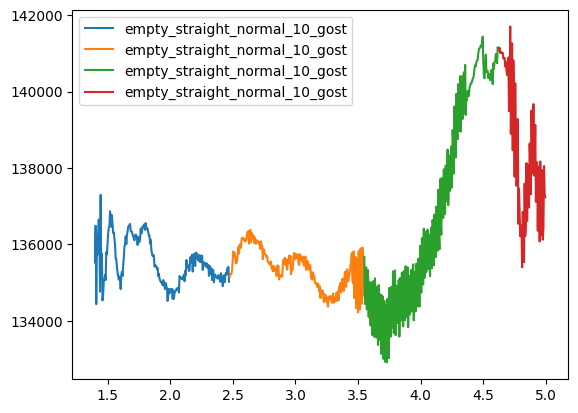

In [35]:
get_splited_dataframe(empty_straight_normal_10, indexes).plot()

**Описание данных фолдов**

<AxesSubplot: xlabel='time_step'>

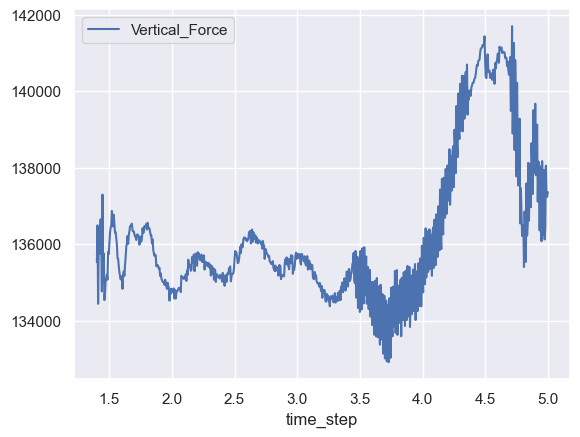

In [23]:
empty_straight_normal_10[empty_straight_normal_10.index > 1.4].plot()

In [26]:
brave_description = empty_straight_normal_10.describe().T

In [27]:
def get_min_max_delta(data:pd.DataFrame):
    max = data.max()
    min = data.min()
    return max-min

In [28]:
get_min_max_delta(empty_straight_normal_10)

Vertical_Force    199170.738
dtype: float64

In [ ]:
brave_description